In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pds

In [ ]:
!apt install octave

# IIR Filter Design

Os filtros IIR têm respostas de impulso de duração infinita, portanto, podem ser combinados com filtros analógicos, que geralmente têm respostas de impulso infinitamente longas. Portanto, a técnica básica de projeto de filtro IIR transforma filtros analógicos bem conhecidos em filtros digitais usando mapeamentos de valores complexos. A vantagem dessa técnica é que tabelas e mapeamentos de projeto de filtros analógicos estão amplamente disponíveis na literatura. Essa técnica básica é chamada de transformação de filtro A/D. No entanto, as tabelas AFD estão disponíveis apenas para filtros passa-baixo. Também queremos projetar outros filtros seletivos de frequência. Para fazer isso, precisamos aplicar transformadas de banda de frequência aos filtros passa-baixa. Essas transformações também são mapas de valores complexos e também estão disponíveis na literatura. Existem duas abordagens para esta técnica básica de projeto de filtro IIR:
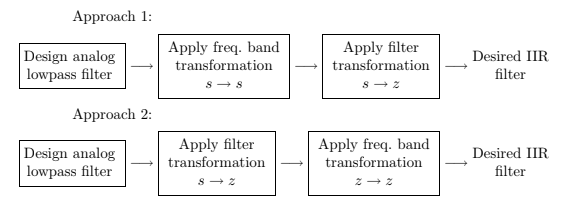

O principal problema com essas abordagens é que não temos controle
sobre as características de fase do filtro IIR. Portanto, os projetos de filtro IIR
serão tratados como projetos somente de magnitude. 

## 8.1 ALGUMAS PRELIMINARES

Discutimos duas questões preliminares nesta seção. Primeiro, examinamos as especificações de resposta de magnitude quadrada, que são mais típicas de filtros de log analógicos. Estas especificações são dadas em uma escala linear relativa. Em segundo lugar, estudamos as propriedades da resposta de magnitude ao quadrado.

### 8.1.1 ESCALA LINEAR RELATIVA

Seja $Ha(jΩ)$ a resposta em frequência de um filtro analógico. Então o passa-baixo
especificações de filtro na resposta de magnitude quadrada são dadas por

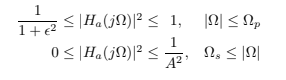

### 8.1.2 PROPRIEDADES DE $|Ha(jΩ)|^2$

As especificações do filtro analógico (8.1), que são fornecidas em termos da resposta de magnitude ao quadrado, não contêm informações de fase. Agora, para avaliar a função Ha(s) do sistema de domínio s, considere \begin{equation} Ha(jΩ) = Ha(s)|
s=jΩ\end{equation}

Portanto, os pólos e zeros da função de magnitude ao quadrado são dis-
tributado em uma simetria de imagem especular em relação ao eixo jΩ. Também para
filtros reais, pólos e zeros ocorrem em pares conjugados complexos (ou espelhados).
simetria da imagem em relação ao eixo real). Um típico padrão de pólo zero
O termo de Ha(s)Ha(−s) é mostrado na Figura 8.2. A partir deste padrão podemos
construa Ha(s), que é a função do sistema do nosso filtro analógico. Nós
deseja que Ha(s) represente um filtro causal e estável. Então todos os pólos de Ha(s)
deve estar dentro do semiplano esquerdo. Assim, atribuímos todos os semi-pólos esquerdos de
Ha(s)Ha(−s) a Ha(s). No entanto, zeros de Ha(s) podem estar em qualquer lugar no
s-plane. Portanto, eles não são unicamente determinados, a menos que todos sejam
no eixo jΩ. Escolheremos os zeros de Ha(s)Ha(−s) à esquerda ou
no eixo jΩ como os zeros de Ha(s). O filtro resultante é então chamado de
filtro de fase mínima.

### 8.2 ALGUNS TIPOS DE FILTROS ESPECIAIS



### 8.2.1 RESSONADORES DIGITAIS

Um ressonador digital é um filtro passa-banda especial de dois polos com um par de
pólos conjugados complexos localizados muito próximos do círculo unitário, como mostrado na
. A magnitude da resposta de frequência do filtro é mostrada
na Figura 8.3b. O nome ressonador refere-se ao fato de que o filtro tem um
resposta de grande magnitude nas proximidades da posição do pólo. O ângulo de
a localização do pólo determina a frequência de ressonância do filtro. Digital
ressonadores são úteis em muitas aplicações, incluindo passa-banda simples
filtragem e geração de fala.

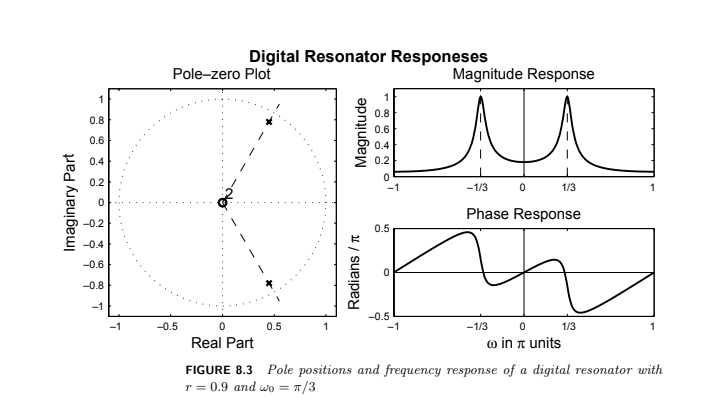

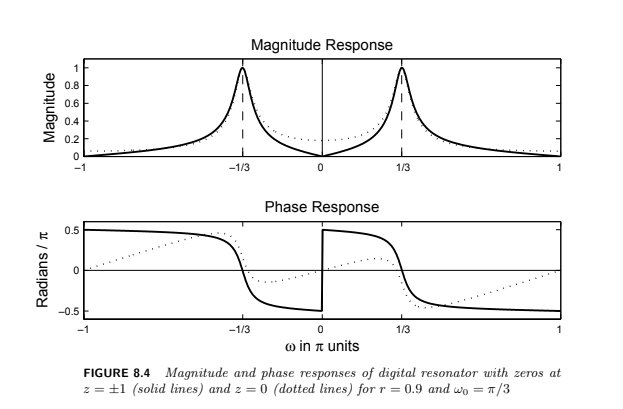

### 8.2.2 FILTROS DE ENTALHE

Um filtro de entalhe é um filtro que contém um ou mais entalhes profundos ou, idealmente, nulos perfeitos em sua resposta de frequência. . Os filtros Notch são úteis em muitas aplicações onde os componentes de frequência específicos devem ser eliminados. Por exemplo, os sistemas de instrumentação exigem que a frequência da rede elétrica de 60 Hz e seus harmônicos sejam eliminados.
Então, a função do sistema para o filtro notch é:

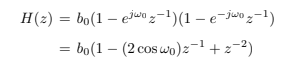

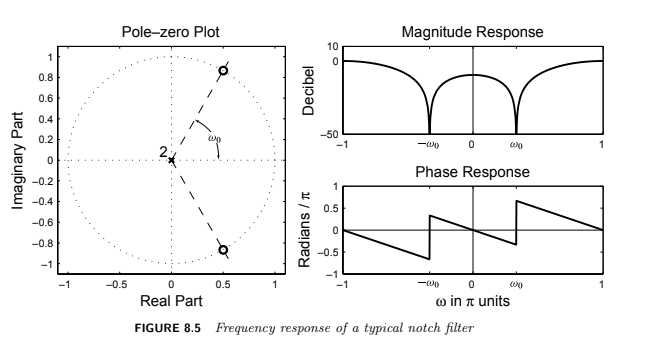

### 8.2.3 FILTROS COMB.

Um filtro notch é um filtro que contém um ou mais sulcos profundos ou, idealmente, nulos perfeitos em sua resposta de frequência. A Figura 8.5 ilustra a resposta de frequência de um filtro notch com nulos na frequência = 0. O filtro notch é útil em muitas aplicações em que componentes de frequência específicos devem ser eliminados. Por exemplo, um sistema de instrumentação requer uma frequência de rede elétrica de 60 Hz e seus harmônicos devem ser eliminados. We can create a comb filter by taking our FIR filter with system
function: \begin{equation} H(z) = \sum_{k=0}^{M}h(k)z^{-k}\end{equation}

### 8.2.4 FILTROS ALLPASS

Um filtro passa-tudo é caracterizado por uma função do sistema que tem uma constante
resposta de magnitude para todas as frequências, ou seja:

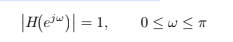

Este sistema passa todos os componentes de frequência de um sinal de entrada sem qualquer atenuação dependente de frequência. Ele simplesmente atrasa todas as frequências
componentes por k amostras. Uma caracterização mais geral de um filtro passa-tudo é aquele que tem um
função do sistema da forma

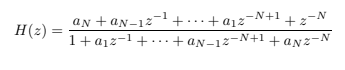

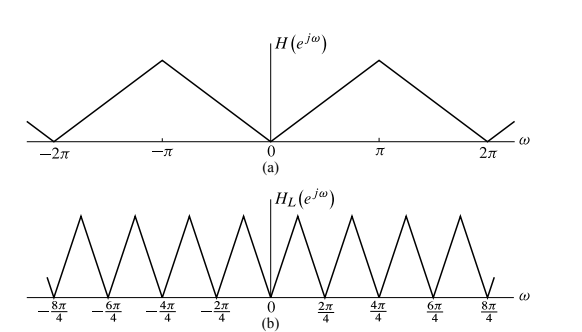

## 8.2.5 DIGITAL SINUSOIDAL OSCILLATORS 

Um oscilador senoidal digital pode ser visto como uma forma limitante de um oscilador de 2 pólos.
ressonador para o qual os pólos conjugados complexos estão localizados no círculo unitário. De nossa discussão anterior sobre ressonadores, a função do sistema para
um ressonador com pólos em $re±jω0$ é:

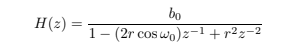

Em aplicações práticas envolvendo modulação de duas cargas senoidais
rier sinais em quadratura de fase, há a necessidade de gerar as senoides A $sen ω0n$ e A $cos ω0n$. Esses sinais de portadora de quadratura podem ser gerados
medido pelo chamado oscilador de forma acoplada, que pode ser obtido com o auxílio das fórmulas trigonométricas

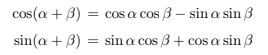

### 8.3 CARACTERÍSTICAS DO PROTÓTIPO DE FILTROS ANALÓGICOS

As técnicas de projeto de filtro IIR dependem de filtros analógicos existentes para obter filtros digitais. Referimo-nos a esses filtros analógicos como filtros de protótipo. Três protótipos são amplamente utilizados na prática. Nesta seção, resumimos brevemente as características das versões passa-baixa desses protótipos: passa-baixa Butter-worth, passa-baixa Chebyshev e passa-baixa elíptica.
Embora usemos funções do MATLAB para projetar esses filtros, é necessário aprender as características desses filtros para que possamos usar os parâmetros apropriados nas funções do MATLAB para obter resultados corretos.

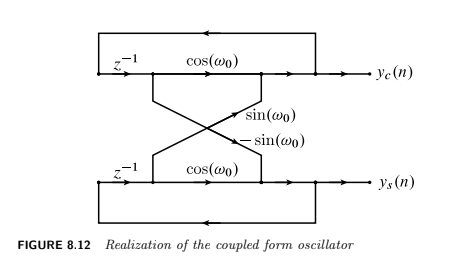

### 8.3.1 FILTROS BUTTERWORTH LOWPASS

Este filtro é caracterizado pela propriedade de que sua resposta de magnitude é plano tanto na banda passante quanto na banda proibida. A resposta de magnitude ao quadrado de
um filtro passa-baixa de ordem N é dado por:

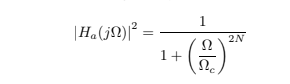

### 8.3.2 MATLAB IMPLEMENTATION

In [8]:
%%writefile ex8-2.m

function [b,a] = u_buttap(N,Omegac);
% Unnormalized Butterworth Analog Lowpass Filter Prototype
% --------------------------------------------------------
% [b,a] = u_buttap(N,Omegac);
% b= numerator polynomial coefficients of Ha(s)
% a= denominator polynomial coefficients of Ha(s)
% N= Order of the Butterworth Filter
% Omegac = Cutoff frequency in radians/sec
%
[z,p,k] = buttap(N);
p = p*Omegac;
k = k*Omegac^N;
B = real(poly(z));
b0 = k; b = k*B; a = real(poly(p));
end

function [C,B,A] = sdir2cas(b,a);
% DIRECT-form to CASCADE-form conversion in s-plane
% -------------------------------------------------
% [C,B,A] = sdir2cas(b,a)
% C = gain coefficient
% B = K by 3 matrix of real coefficients containing bk’s
% A = K by 3 matrix of real coefficients containing ak’s
% b = numerator polynomial coefficients of DIRECT form
% a = denominator polynomial coefficients of DIRECT form
%
Na = length(a)-1; Nb = length(b)-1;
% compute gain coefficient C
b0 = b(1); b = b/b0; a0 = a(1); a = a/a0; C = b0/a0;
%
% Denominator second-order sections:
p= cplxpair(roots(a)); K = floor(Na/2);
if K*2 == Na % Computation when Na is even
  A = zeros(K,3);
  for n=1:2:Na
    Arow = p(n:1:n+1,:); Arow = poly(Arow);
    A(fix((n+1)/2),:) = real(Arow);
  end
elseif Na == 1 % Computation when Na = 1
  A = [0 real(poly(p))];
else % Computation when Na is odd and > 1
  A = zeros(K+1,3);
  for n=1:2:2*K
    Arow = p(n:1:n+1,:); Arow = poly(Arow);
    A(fix((n+1)/2),:) = real(Arow);
    end
    A(K+1,:) = [0 real(poly(p(Na)))];
end

% Numerator second-order sections:
z = cplxpair(roots(b)); K = floor(Nb/2);
if Nb == 0 % Computation when Nb = 0
  B = [0 0 poly(z)];
elseif K*2 == Nb % Computation when Nb is even
  B = zeros(K,3);
  for n=1:2:Nb
    Brow = z(n:1:n+1,:); Brow = poly(Brow);
    B(fix((n+1)/2),:) = real(Brow);
  end
elseif Nb == 1 % Computation when Nb = 1
  B = [0 real(poly(z))];
else % Computation when Nb is odd and > 1
  B = zeros(K+1,3);
  for n=1:2:2*K
    Brow = z(n:1:n+1,:); Brow = poly(Brow);
    B(fix((n+1)/2),:) = real(Brow);
  end
  B(K+1,:) = [0 real(poly(z(Nb)))];
end

N = 3; OmegaC = 0.5; [b,a] = u_buttap(N,OmegaC);
[C,B,A] = sdir2cas(b,a)

Overwriting ex8-2.m


In [9]:
!octave -W ex8-2.m

which seems to not be installed in your system.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: 'buttap' undefined near line 11 column 10
error: called from
    u_buttap at line 11 column 8
    ex8-2.m at line 20 column 27


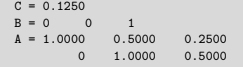

### 8.3.3 DESIGN EQUATIONS

O filtro passa-baixa analógico é especificado pelos parâmetros $Ωp, Rp, Ωs$ e
Como. Portanto, a essência do projeto no caso do filtro Butterworth
é obter a ordem N e a frequência de corte Ωc, dadas essas especificações
cátions. Nós queremos:

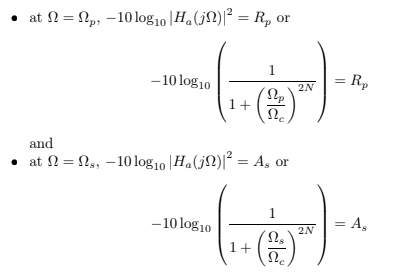

### 8.3.5 FILTROS CHEBYSHEV LOWPASS

Existem dois tipos de filtros Chebyshev. Os filtros Chebyshev-I têm resposta de paridade na banda passante, enquanto os filtros Chebyshev-II têm resposta de paridade na banda de parada. Os filtros Butterworth têm uma resposta monótona em ambas as bandas. Lembre-se de nossa discussão sobre filtros FIR iguais. Observamos que podemos obter um filtro de ordem inferior escolhendo um filtro igualitário em vez de um comportamento monótono. Isso é por que
A ordem dos filtros Chebyshev é inferior à dos filtros Butterworth para as mesmas especificações.

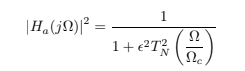

### 8.3.10 ELLIPTIC LOWPASS FILTERS

Esses filtros exibem um comportamento equivalente tanto na banda passante quanto na banda de interferência. Eles têm características de resposta semelhantes aos filtros equiripple FIR. Portanto, os filtros elípticos são filtros ótimos na medida em que atingem a ordem mínima N para as especificações dadas. Esses filtros são, por razões óbvias, muito difíceis de analisar e, portanto, de projetar. Eles não podem ser projetados usando ferramentas simples e geralmente requerem programas ou planilhas para projetá-los.

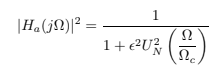

### 8.3.11 CÁLCULO DA ORDEM DO FILTRO N

Embora a análise de (8.61) seja difícil, a fórmula de cálculo da ordem é muito compacta e está disponível em muitos livros didáticos [18, 23, 24]. é dado por:

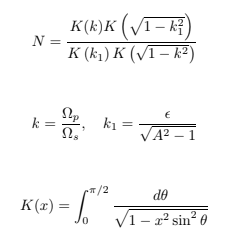

### 8.3.13 RESPOSTAS DE FASE DE FILTROS DE PROTÓTIPO

Os filtros elípticos fornecem desempenho ideal na resposta de tamanho ao quadrado, mas têm uma resposta de fase bastante não linear na banda passante. Embora tenhamos decidido não nos preocupar com a resposta de fase em nossos projetos, a fase ainda é uma questão importante no sistema geral. No outro extremo da escala de desempenho estão os filtros Butter-worth, que têm a resposta de magnitude plana máxima e requerem uma ordem N mais alta para atingir a mesma especificação de banda de parada.
No entanto, eles exibem uma resposta de fase altamente linear nas bandas passantes.
Os filtros Chebyshev têm propriedades de fase que estão em algum lugar no meio. Portanto, em aplicações práticas, consideramos os filtros Butterworth e Chebyshev além dos filtros elípticos. A escolha depende tanto da ordem do filtro quanto das características da fase.

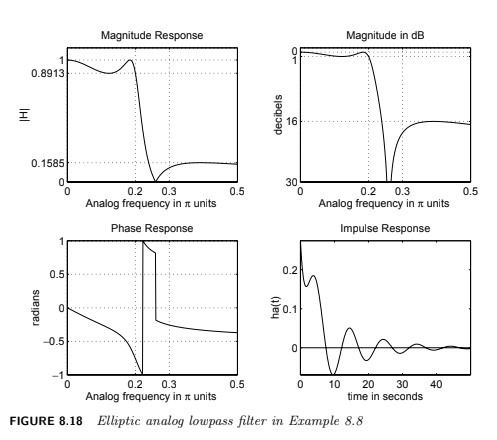

## 8.4 TRANSFORMAÇÕES DE FILTRO ANALÓGICO PARA DIGITAL

Depois de discutir diferentes abordagens para o projeto de filtros analógicos, agora estamos prontos para convertê-los em filtros digitais. Essas transformações são representações complexas amplamente estudadas na literatura. Essas transformações são derivadas da preservação de diferentes aspectos dos filtros analógicos e digitais. Se quisermos preservar a forma da resposta ao impulso de um filtro analógico para digital, obtemos uma técnica chamada transformação invariante de impulso. Se quisermos converter a representação da equação diferencial na representação correspondente da equação de diferenças, obtemos a técnica de aproximação de diferenças finitas. Várias outras técnicas também são possíveis. Uma técnica, chamada invariância degrau, preserva a forma da resposta degrau; isso é explorado no Problema P8.24. Outra técnica semelhante à invariância de impulso é a transformada matched-z, que corresponde à representação do pólo zero. Ele é descrito no final desta seção e explorado no Problema P8.26. A técnica mais popular utilizada na prática é a chamada transformação bilinear, que preserva a representação da função do sistema do domínio analógico para o digital.

### 8.4.1 TRANSFORMAÇÃO DE INVARIÂNCIA DE IMPULSO

Neste método de projeto, queremos que a resposta ao impulso do filtro digital pareça
“semelhante” ao de um filtro analógico de frequência seletiva. Daí nós amostramos
$ha(t)$ em algum intervalo de amostragem T para obter $h(n)$; isso é: $ h(n) = h_{a}(nT) $

1. Usando σ = Re(s), notamos que

    σ < 0 mapeia em |z| < 1 (dentro da UC)

    σ = 0 mapeia em |z| = 1 (no UC)

    σ > 0 mapeia em |z| > 1 (fora da UC)

2. Todas as faixas semi-infinitas (mostrada acima) de largura 2π/T são mapeadas em |z| < 1.
Portanto, esse mapeamento não é exclusivo, mas um mapeamento de muitos para um.
3. Como toda a metade esquerda do plano s é mapeada no círculo unitário, um
mapas de filtros analógicos causais e estáveis em um digital causal e estável
filtro.
4. If $Ha(jΩ) = Ha(jω/T)=0 for |Ω| ≥ π/T$, then
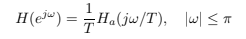



### 8.4.3 BILINEAR TRANSFORMATION

Esse mapeamento é o melhor método de transformação; envolve um conhecido
função dada por

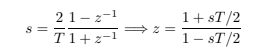

1. Usando $s = σ + jΩ $em (8.65), obtemos:

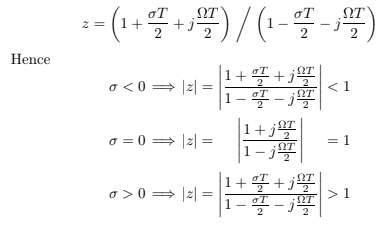

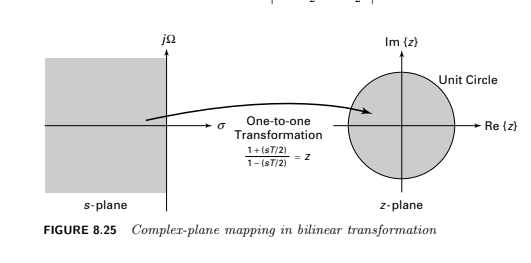

2. Todo o semiplano esquerdo é mapeado dentro do círculo unitário. Conseqüentemente
esta é uma transformação estável.
3. O eixo imaginário é mapeado no círculo unitário de maneira um-para-um.
Portanto, não há aliasing no domínio da frequência.

In [10]:
%%writefile ex8-16.m

c = [1,1]; d = [1,5,6]; T = 1; Fs = 1/T;
[b,a] = bilinear(c,d,Fs)

Writing ex8-16.m


In [11]:
!octave -W ex8-16.m

which seems to not be installed in your system.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: 'bilinear' undefined near line 3 column 8
error: called from
    ex8-16.m at line 3 column 6


### 8.4.5 TRANSFORMAÇÃO MATCHED-z

Neste método de transformação de filtro, zeros e pólos de $Ha(s)$ são di-
mapeados diretamente em zeros e pólos no plano z usando uma exponencial
função. Dada uma raiz (zero ou pólo) no local s = a no plano s,
nós o mapeamos no plano z em $z = e^{aT}$ onde T é um intervalo de amostragem. Desta forma,
a função do sistema $Ha(s)$ com zeros {zk} e pólos {p} é mapeada em
a função do sistema de filtro digital $H(z)$ como

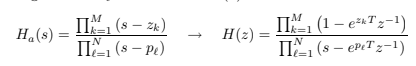

## 8.5 PROJETO DE FILTRO LOWPASS USANDO MATLAB

Nesta seção, demonstraremos o uso das funções de projeto de filtro do MATLAB para projetar filtros passa-baixa digitais. Essas funções usam a transformada bilinear por causa de suas vantagens desejáveis, conforme discutido na seção anterior. Essas funções são as seguintes:

1. [b,a]=manteiga(N,wn)
Esta função projeta um filtro Butterworth digital passa-baixa de ordem N
e retorna os coeficientes do filtro em comprimento N +1vetores b e a.

2. [b,a]=cheby1(N,Rp,wn)
Esta função projeta um filtro Chebyshev-I digital passa-baixa de ordem N
com Rp decibéis de ondulação na banda passante. Ele retorna o coeficiente do filtro
ficientes em comprimento N +1vetores b e a.

3. [b,a]=cheby2(N,As,wn)
Esta função projeta um filtro Chebyshev-II digital passa-baixa de ordem N
com a atenuação da banda de parada em decibéis. Ele retorna o coeficiente do filtro
ficientes em comprimento N +1vetores b e a.

4. [b,a]=ellip(N,Rp,As,wn)
This function designs an Nth-order lowpass digital elliptic filter with
the passband ripple of Rp decibels and a stopband attenuation of As
decibels. It returns the filter coefficients in length N +1vectors b and
a.

In [18]:
%%writefile ex8-21.m

% Digital Filter Specifications:
wp = 0.2*pi; %digital Passband freq in rad
ws = 0.3*pi; %digital Stopband freq in rad
Rp = 1; %Passband ripple in dB
As = 15; %Stopband attenuation in dB
% Analog Prototype Specifications:
T = 1; %Set T=1
OmegaP = (2/T)*tan(wp/2); %Prewarp Prototype Passband freq
OmegaS = (2/T)*tan(ws/2); %Prewarp Prototype Stopband freq
% Analog Prototype Order Calculation:
N =ceil((log10((10^(Rp/10)-1)/(10^(As/10)-1)))/(2*log10(OmegaP/OmegaS)));
fprintf('\n*** Butterworth Filter Order = %2.0f \n',N)

OmegaC = OmegaP/((10^(Rp/10)-1)^(1/(2*N))); %Analog BW prototype cutoff
wn = 2*atan((OmegaC*T)/2); %Digital BW cutoff freq
% Digital Butterworth Filter Design:
wn = wn/pi; %Digital Butter cutoff in pi units
[b,a]=butter(N,wn); [b0,B,A] = dir2cas(b,a)

Overwriting ex8-21.m


In [19]:
!octave -W ex8-21.m


*** Butterworth Filter Order =  6 
which seems to not be installed in your system.

Please read <http://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: 'butter' undefined near line 19 column 6
error: called from
    ex8-21.m at line 19 column 5


## 8.6 TRANSFORMAÇÕES DE BANDA DE FREQUÊNCIA

Projetamos filtros passa-baixa digitais a partir dos filtros analógicos correspondentes nas duas seções anteriores. Obviamente, gostaríamos de projetar outros tipos de filtros seletivos de frequência, como passa-alta, passa-faixa e parada de banda. Isso é feito transformando o eixo de frequência de um filtro passa-baixo para que ele se comporte como outro filtro seletivo de frequência. Essas transformações na variável complexa z são muito semelhantes às transformações bilineares e as equações de projeto são algébricas. Um procedimento geral para projetar um filtro seletivo de frequência é primeiro projetar um protótipo digital de filtro passa-baixa e, em seguida, aplicar essas transformações algébricas. Nesta seção, explicaremos a filosofia básica por trás desses mapeamentos e ilustraremos seu mecanismo com exemplos. O MATLAB fornece funções que envolvem conversão de banda de frequência no plano s.

Seja $HLP (Z)$ o protótipo de filtro digital passa-baixa fornecido e$ H(z)$
ser o filtro digital seletivo de frequência desejado. Note que estamos usando
duas variáveis de frequência diferentes, Z e z, com HLP e H, respectivamente.
Definir um mapeamento do formulário $ Z^{-1} = G(z^{-1}) $

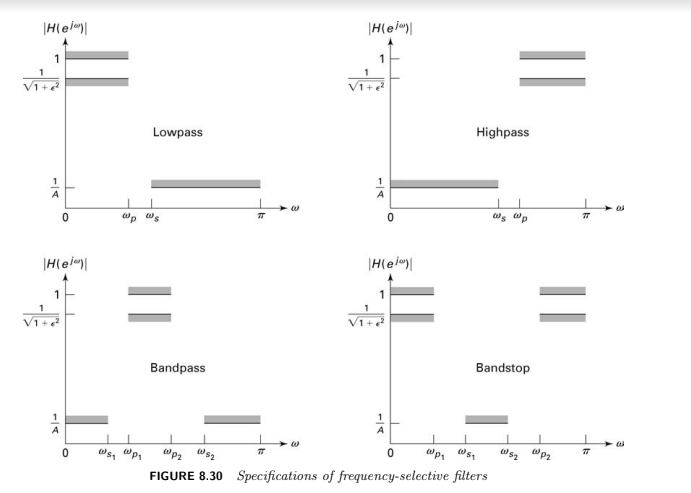

1. G(·) deve ser uma função racional em $z^{-1}$ para que $H(z)$ seja implementável.
2. O círculo unitário do plano Z deve mapear o círculo unitário do
plano z.
3. Para filtros estáveis, o interior do círculo unitário do plano Z também deve
map no interior do círculo unitário do plano z.